In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

#Datasets

The project focuses on analyzing Zomato restaurant data for various cities in India. The goal is to gain insights into the Indian food industry by examining customer sentiments in reviews. The analysis involves visualizing data, clustering restaurants into segments, and addressing business cases to aid both customers in finding the best local restaurants and the company in areas of improvement. The data provides valuable information on cuisine, costing, and reviewer metadata, which can be utilized for sentiment analysis and identifying industry critics. Ultimately, the project aims to enhance the understanding of the restaurant landscape and contribute to business growth

In [4]:
reviews=pd.read_csv('/content/drive/MyDrive/Zomato resturant clustering and sentimental analysis/Zomato Restaurant reviews.csv')
restaurant=pd.read_csv('/content/drive/MyDrive/Zomato resturant clustering and sentimental analysis/Zomato Restaurant names and Metadata.csv')

##Review dataset

In [5]:
reviews

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


###Null values

In [6]:
reviews.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [7]:
reviews.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [8]:
#considering only the rows with null value
rows_with_null= reviews[reviews.isnull().any(axis=1)]
rows_with_null

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
2360,Amul,Lakshmi Narayana,NaN,5,0 Reviews,7/29/2018 18:00,0
5799,Being Hungry,Surya,NaN,5,"4 Reviews , 4 Followers",7/19/2018 23:55,0
6449,Hyderabad Chefs,Madhurimanne97,NaN,5,1 Review,7/23/2018 16:29,0
6489,Hyderabad Chefs,Harsha,NaN,5,1 Review,7/8/2018 21:19,0
7954,Olive Garden,ARUGULLA PRAVEEN KUMAR,NaN,3,"1 Review , 1 Follower",8/9/2018 23:25,0
8228,Al Saba Restaurant,Suresh,NaN,5,1 Review,7/20/2018 22:42,0
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In [9]:
rows_with_null.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [10]:
rows_with_null['Restaurant'].value_counts()

Restaurant
American Wild Wings    23
Arena Eleven           15
Hyderabad Chefs         2
Amul                    1
Being Hungry            1
Olive Garden            1
Al Saba Restaurant      1
Domino's Pizza          1
Name: count, dtype: int64

* Few rows have the valid ratings(which is usefull in calculation of average rating for the restaurants),hence keeping these rows by replacing the corresponding null entry of the 'review' with 'None'.
* Even if we remove all the rows that has null values(in 'rating' column) now,we will loose only 38 rows of the dataset(0.38% of the data),also we will still preserve reviews of all the restaurants.Hence we can remove the rows with null values.

In [11]:
reviews1= reviews.dropna(subset=['Rating'])
reviews1['Review'].fillna('None', inplace=True)

In [12]:
reviews1.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [13]:
reviews1['Time'][0]

'5/25/2019 15:54'

In [14]:
col1=reviews1.columns

###Datatype of each column

In [15]:
for col in col1:
  print(f"For {col}:\n",type(reviews1[col][0]))

For Restaurant:
 <class 'str'>
For Reviewer:
 <class 'str'>
For Review:
 <class 'str'>
For Rating:
 <class 'str'>
For Metadata:
 <class 'str'>
For Time:
 <class 'str'>
For Pictures:
 <class 'numpy.int64'>


####Converting the datatype of 'Time' column to 'datetime'

In [16]:
reviews1['Time'] = pd.to_datetime(reviews1['Time'], errors='coerce')

####Converting the datatype of 'Rating' column to 'float'

In [17]:
# Identify non-numeric values in the 'Rating' column
non_numeric_ratings = reviews1[~reviews1['Rating'].str.isnumeric()]['Rating']
# Display the non-numeric values
print("Non-numeric values in 'Rating' column:", non_numeric_ratings.unique())


Non-numeric values in 'Rating' column: ['3.5' '4.5' '2.5' '1.5' 'Like']


In [18]:
non_numeric_ratings.value_counts()

Rating
4.5     69
3.5     47
2.5     19
1.5      9
Like     1
Name: count, dtype: int64

In [19]:
# Replace 'Like' values with NaN
reviews1['Rating'].replace('Like', np.nan, inplace=True)
# Convert the 'Rating' column to float, replacing non-numeric values with NaN
reviews1['Rating'] = pd.to_numeric(reviews1['Rating'], errors='coerce')
# Replace NaN values with the median of the ratings
median_rating = reviews1['Rating'].median()
reviews1['Rating'].fillna(median_rating, inplace=True)

In [20]:
reviews1['Rating'].describe()

count    9962.000000
mean        3.601084
std         1.483392
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

##Restaurant dataset

In [21]:
restaurant

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


###Null values

In [22]:
restaurant.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [23]:
restaurant.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [24]:
restaurant[restaurant['Timings'].isnull()]

,Name,Links,Cost,Collections,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN


In [25]:
reviews1[reviews1['Restaurant']=='Pot Pourri']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
3000,Pot Pourri,Binnani,I had bad experience here with Masala Papad. I...,3.0,2 Reviews,2019-05-25 14:43:00,0
3001,Pot Pourri,Sravani,Nice ambiance....different and delicious food....,5.0,"10 Reviews , 10 Followers",2019-05-22 13:56:00,1
3002,Pot Pourri,Arunraj R,Affordable good food. I would have given a 5 s...,4.0,"10 Reviews , 64 Followers",2019-05-21 23:12:00,0
3003,Pot Pourri,Asha Tejaswini,I had the worst experience with the food and t...,1.0,"14 Reviews , 10 Followers",2019-05-17 20:36:00,0
3004,Pot Pourri,Chandrasekhar Dasika,"*IF YOU ARE READING THIS, AND SITLL GOING TO T...",1.0,"5 Reviews , 29 Followers",2019-05-13 12:48:00,0
...,...,...,...,...,...,...,...
3095,Pot Pourri,Rakesh Bandiwar,Amazing place to have south Indian cuisine.\nG...,4.0,"44 Reviews , 5210 Followers",2019-01-17 15:01:00,0
3096,Pot Pourri,Aishwariya Kawaii,Our usual hangout place. Every time we think o...,5.0,"10 Reviews , 1 Follower",2019-01-14 16:43:00,0
3097,Pot Pourri,Saketh Goundagouni,I was there with my friends yesterday for dinn...,4.0,"4 Reviews , 2 Followers",2019-01-11 10:37:00,0
3098,Pot Pourri,Tasty Hyderabad,This place was in my bucket list since a very ...,3.0,"75 Reviews , 174 Followers",2019-01-10 17:51:00,9


* Out of the total 105 rows, 54 rows (51.42%) contain null values in the 'Collections' column. Therefore, it is advisable to exclude the 'Collections' column from the analysis, as it is not expected to contribute any meaningful insights
* There is a Null value in 'Timings' which cannot be removed as it has information for the restaurant named 'Pot Pourri',hence we will replace this value 'unknown'.

In [26]:
restaurant.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [27]:
restaurant = restaurant.drop(columns=['Collections'])

# Replace 'NaN' values in the 'Timings' column with 'Unknown'
restaurant['Timings'] = restaurant['Timings'].fillna('Unknown')

In [28]:
restaurant

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,Fast Food,8am to 12:30AM (Mon-Sun)


###Datatype of each column

In [29]:
col2=restaurant.columns
for col in col2:
  print(f"For {col}:\n",type(restaurant[col][0]))

For Name:
 <class 'str'>
For Links:
 <class 'str'>
For Cost:
 <class 'str'>
For Cuisines:
 <class 'str'>
For Timings:
 <class 'str'>


####Converting the datatype of values in 'cost' column to 'float'.

In [30]:
# Remove commas from the 'Cost' column
restaurant['Cost'] = restaurant['Cost'].str.replace(',', '')
# Convert the 'Cost' column to numeric
restaurant['Cost'] = pd.to_numeric(restaurant['Cost'], errors='coerce')

In [31]:
x=restaurant[(restaurant['Cost']>500) & (restaurant['Cost']<=600)]

In [32]:
x.shape

(13, 5)

#EDA

##Distribution of ratings


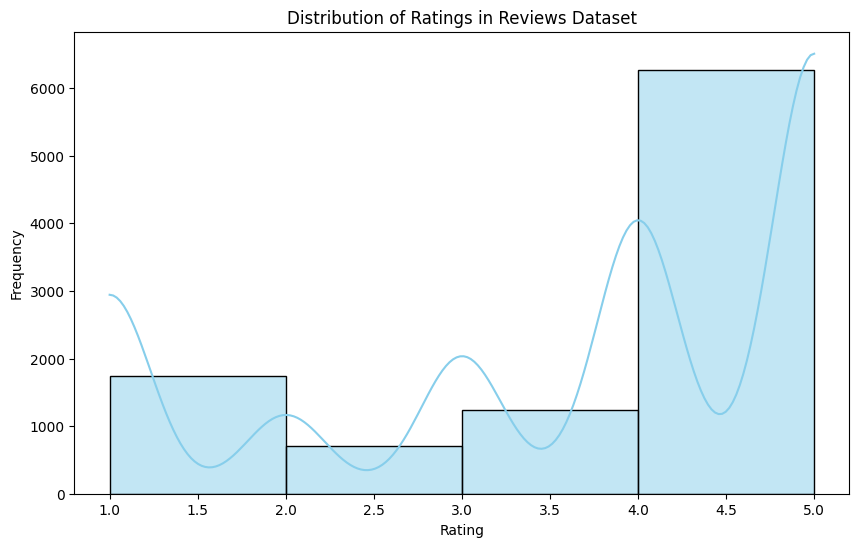

In [33]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Define bin edges based on your preferred alignment
bin_edges = [1.0, 2.0, 3.0, 4.0, 5.0]

# Create a histogram of ratings with specified bin edges
sns.histplot(reviews1['Rating'], bins=bin_edges, kde=True, color='skyblue')

# Set the title and labels
plt.title('Distribution of Ratings in Reviews Dataset')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Show the plot
plt.show()

* The rating distribution reveals a predominant trend where the majority of reviewers assigned ratings in the range of 4-5, while the fewest reviewers opted for the 2-3 rating bracket.
* Additionally, the second-highest number of reviewers provided ratings within the 1-2 range.

The concentration of higher ratings suggests a general positive sentiment among reviewers

##Sentiment Analysis


###Preprocessing 'Review'

In [34]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Stemming (optional)
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]

    # Join the words back into a sentence
    preprocessed_text = ' '.join(words)

    return preprocessed_text




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [35]:
reviews1['Preprocessed_Review'] = reviews1['Review'].apply(preprocess_text)

###Sentiment-TextBlob

In [36]:

from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

reviews1['Sentiment'] = reviews1['Review'].apply(get_sentiment)

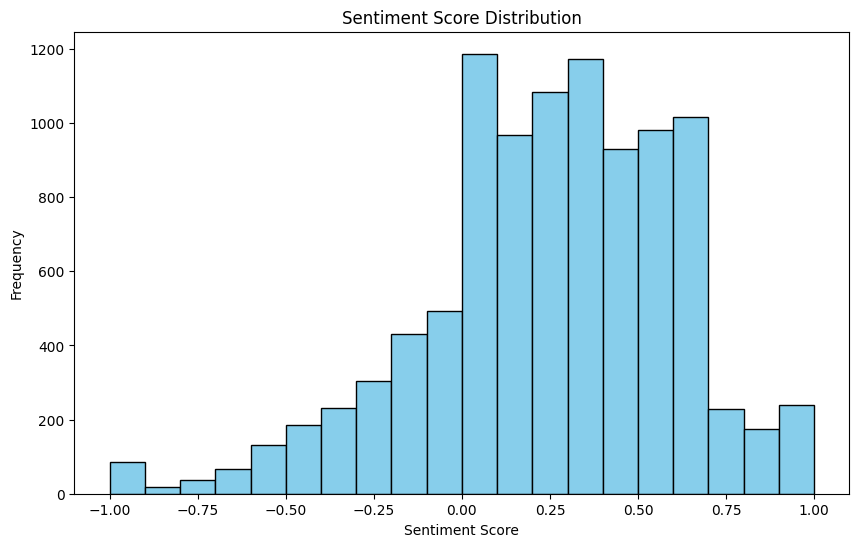

In [37]:
plt.figure(figsize=(10, 6))

# Plot the histogram
plt.hist(reviews1['Sentiment'], bins=20, color='skyblue', edgecolor='black')

plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [38]:
reviews1['Sentiment'].describe()

count    9962.000000
mean        0.250566
std         0.364981
min        -1.000000
25%         0.004167
50%         0.278920
75%         0.505675
max         1.000000
Name: Sentiment, dtype: float64

 We will consider the following.
 * Sentiments above the median(0.2789) are Positive sentiment.
 * Sentiments below -0.2789 are Negative sentiment.

###Sentiment-Wordcloud

In [39]:
positive=reviews1[reviews1['Sentiment']>0.28]

negative=reviews1[reviews1['Sentiment']<-0.28]

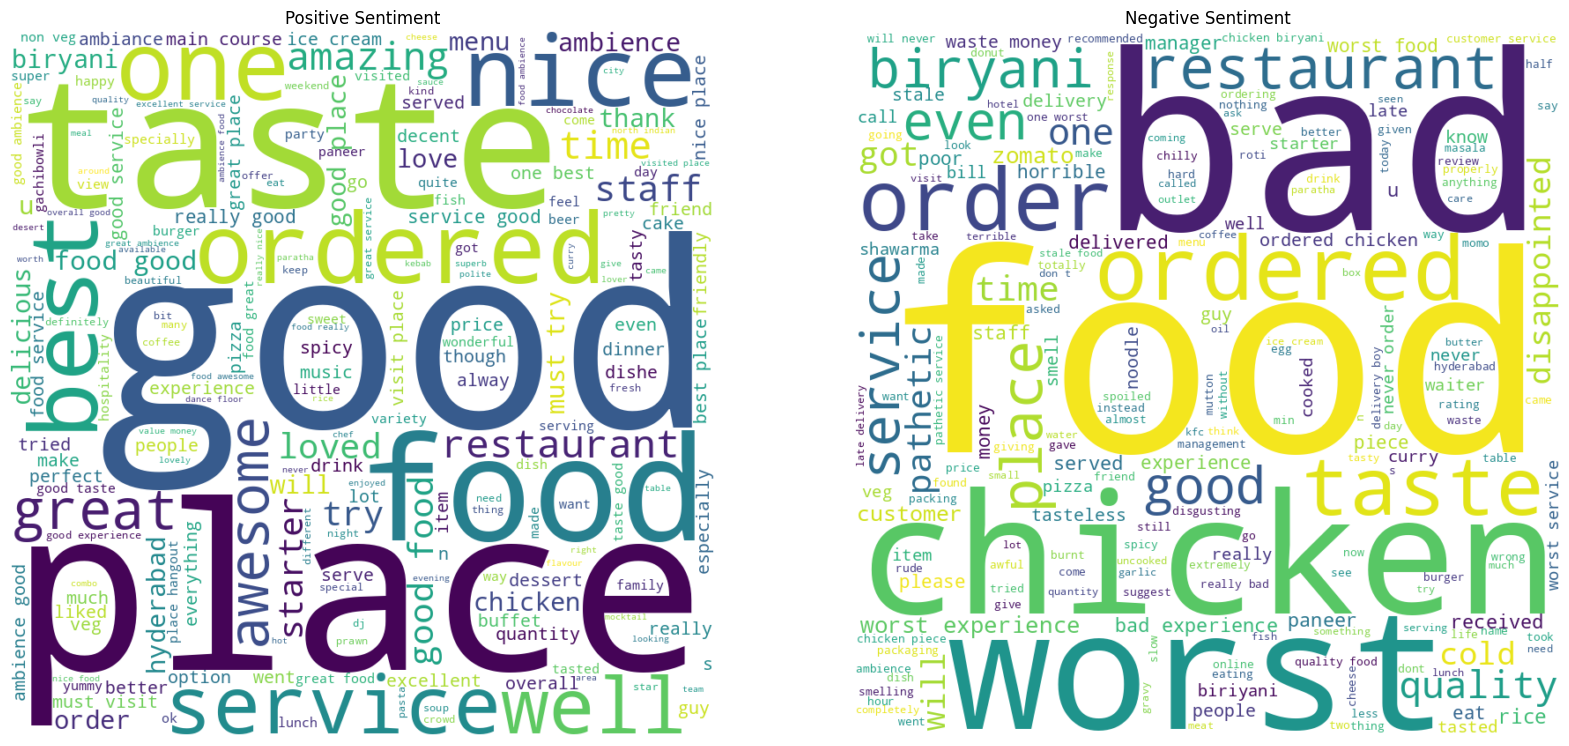

In [40]:
from wordcloud import WordCloud, STOPWORDS
# Function to generate word clouds
def generate_wordcloud(sentiment, title):
    comment_words = ''
    for val in sentiment.Review:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        comment_words += " ".join(tokens) + " "

    # Remove stopwords
    stopwords = set(STOPWORDS)
    comment_words = ' '.join([word for word in comment_words.split() if word.lower() not in stopwords])

    wordcloud = WordCloud(width=800, height=800, background_color='white',
                          min_font_size=10, colormap='viridis').generate(comment_words)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)

# Create subplots
plt.figure(figsize=(20, 12))

plt.subplot(1, 2, 1)
generate_wordcloud(positive, "Positive Sentiment")


plt.subplot(1, 2, 2)
generate_wordcloud(negative, "Negative Sentiment")

plt.show()

##Average rating for each restaurant
When calculating the average rating for a restaurant, using all ratings might provide a more comprehensive view, as it considers the opinions of a broader audience.

In [41]:
mean_rating_by_restaurant = reviews1.groupby('Restaurant')['Rating'].mean().reset_index()

# Display the mean rating for each restaurant
print(mean_rating_by_restaurant)

                               Restaurant  Rating
0                       10 Downing Street    3.80
1                                13 Dhaba    3.48
2          3B's - Buddies, Bar & Barbecue    4.76
3               AB's - Absolute Barbecues    4.88
4                       Absolute Sizzlers    3.62
..                                    ...     ...
95             Urban Asia - Kitchen & Bar    3.65
96  Yum Yum Tree - The Arabian Food Court    3.56
97        Zega - Sheraton Hyderabad Hotel    4.45
98               Zing's Northeast Kitchen    3.65
99                                eat.fit    3.20

[100 rows x 2 columns]


In [42]:
reviews1.isnull().sum()

Restaurant             0
Reviewer               0
Review                 0
Rating                 0
Metadata               0
Time                   0
Pictures               0
Preprocessed_Review    0
Sentiment              0
dtype: int64

In [43]:

fig = px.scatter(
    mean_rating_by_restaurant,
    x='Rating',
    y='Restaurant',
    size='Rating',
    size_max=50,  # Adjust the maximum size of the bubble
    hover_name='Restaurant',  # Display restaurant name on hover
    labels={'Rating': 'Mean Rating'},
    color='Rating',
    title='Restaurants and the mean ratings by Reviewers'
)

fig.update_layout(
    yaxis=dict(
        title=None,
        tickmode='array',
        tickvals=[]  # Empty array to remove y-axis labels
    )
)
# Show the plot
fig.show()

##Number of restaurants for each price range

In [44]:
# Define the bins and labels for price ranges
bins = [0, 500, 600, 700, 800, 900, 1000, 1500, 2000, float('inf')]
labels = ['Below 500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000-1500', '1500-2000', 'Above 2000']

# Create a new column 'Price Range' based on the bins
restaurant['Price Range'] = pd.cut(restaurant['Cost'], bins=bins, labels=labels)

# Create an interactive countplot using Plotly
fig = px.histogram(
    restaurant,
    x='Price Range',
    title='Count of Restaurants in Different Price Range',
    labels={'count': 'Count', 'Price Range': 'Price Range'},
    category_orders={'Price Range': labels},
    color='Price Range',  # Assign different colors to bars based on the 'Price Range'
    hover_data={'Price Range',}
)

# Set the figure size
fig.update_layout(width=800, height=600)

# Show the figure
fig.show()

##Number of restaurants for each cuisine

In [45]:
# Create a list of all unique cuisines
unique_cuisines = set(','.join(restaurant['Cuisines'].dropna()).split(', '))

# Convert the 'Cuisines' column to a list of cuisines for each row
restaurant['Cuisines'] = restaurant['Cuisines'].apply(lambda x: x.split(', ') if pd.notna(x) else [])

# Display the unique cuisines and the modified 'Cuisines' column
print("Unique Cuisines:", unique_cuisines)
print("\nModified 'Cuisines' column:")
print(restaurant['Cuisines'])

Unique Cuisines: {'North Indian', 'Desserts', 'Chinese,South Indian', 'Mithai,North Indian', 'Beverages,Asian', 'Fast Food,North Indian', 'Fast Food,Italian', 'Mughlai,Asian', 'Fast Food,North Indian,Chinese', 'Sushi,North Indian', 'Biryani,North Indian,North Indian', 'Asian,Cafe', 'Asian,North Indian', 'Salad', 'Mughlai', 'Seafood', 'Biryani,Biryani', 'Burger', 'Italian', 'Chinese,Chinese', 'Desserts,American', 'Italian,North Indian', 'Continental,Biryani', 'Italian,BBQ', 'Sushi,American,Ice Cream', 'Beverages,Bakery', 'BBQ,Continental', 'Hyderabadi', 'Italian,Kebab', 'Desserts,Finger Food', 'Hyderabadi,Burger', 'Chinese,Momos,Cafe', 'Continental,Continental,Mexican', 'Japanese', 'Salad,North Indian', 'Desserts,North Indian', 'Indonesian', 'South Indian', 'North Indian,Bakery', 'North Indian,Biryani', 'Salad,Bakery', 'Mediterranean', 'Momos,North Indian', 'American', 'Desserts,Cafe', 'Biryani,Fast Food,Andhra', 'Chinese,Arabian', 'Seafood,Fast Food', 'Mediterranean,Seafood', 'European

In [46]:
all_cuisines_list = [cuisine for sublist in restaurant['Cuisines'].dropna() for cuisine in sublist]

# Create a set to get unique cuisines
unique_cuisines_set = set(all_cuisines_list)

# Convert the set back to a list
unique_cuisines_list = list(unique_cuisines_set)

# Display the unique cuisines
print("Unique Cuisines:", unique_cuisines_list)

Unique Cuisines: ['North Indian', 'Finger Food', 'Asian', 'Desserts', 'Japanese', 'Mithai', 'Andhra', 'Goan', 'Beverages', 'Bakery', 'Indonesian', 'South Indian', 'Ice Cream', 'Healthy Food', 'Lebanese', 'Juices', 'Street Food', 'Salad', 'Mughlai', 'Cafe', 'Spanish', 'Seafood', 'Arabian', 'Burger', 'Wraps', 'Italian', 'Mediterranean', 'Kebab', 'Modern Indian', 'American', 'Mexican', 'Biryani', 'Malaysian', 'Hyderabadi', 'Momos', 'Chinese', 'Thai', 'BBQ', 'Pizza', 'European', 'Fast Food', 'North Eastern', 'Sushi', 'Continental']


In [47]:
cuisine_rest = {}

for cuisine in unique_cuisines_list:
    rest = []
    for i in range(len(restaurant['Name'])):
        if cuisine in restaurant['Cuisines'][i]:
            rest.append(restaurant['Name'][i])
    cuisine_rest[cuisine] = rest

# Display the dictionary
for cuisine, restaurants in cuisine_rest.items():
    print(f"{cuisine}: {restaurants}")

North Indian: ['Beyond Flavours', 'Paradise', 'Flechazo', 'Shah Ghouse Hotel & Restaurant', 'Over The Moon Brew Company', "The Fisherman's Wharf", 'eat.fit', 'Hyper Local', "Sardarji's Chaats & More", 'Barbeque Nation', 'The Lal Street - Bar Exchange', "AB's - Absolute Barbecues", 'NorFest - The Dhaba', 'Hotel Zara Hi-Fi', '10 Downing Street', 'Pakwaan Grand', '13 Dhaba', "Jonathan's Kitchen - Holiday Inn Express & Suites", 'SKYHY', 'Mustang Terrace Lounge', "3B's - Buddies, Bar & Barbecue", 'Pot Pourri', 'Pista House', 'Marsala Food Company', 'Club Rogue', 'Mazzo - Marriott Executive Apartments', 'Green Bawarchi Restaurant', 'Banana Leaf Multicuisine Restaurant', 'Kritunga Restaurant', 'The Glass Onion', 'La La Land - Bar & Kitchen', 'Owm Nom Nom', 'Ulavacharu', "Udipi's Upahar", 'Mathura Vilas', 'Gal Punjab Di', 'Hitech Bawarchi Food Zone', 'Biryanis And More', 'Being Hungry', 'PourHouse7', 'Prism Club & Kitchen', 'Shree Santosh Dhaba Family Restaurant', 'Hyderabad Chefs', 'Komatose 

In [48]:
cuisine_rest

{'North Indian': ['Beyond Flavours',
  'Paradise',
  'Flechazo',
  'Shah Ghouse Hotel & Restaurant',
  'Over The Moon Brew Company',
  "The Fisherman's Wharf",
  'eat.fit',
  'Hyper Local',
  "Sardarji's Chaats & More",
  'Barbeque Nation',
  'The Lal Street - Bar Exchange',
  "AB's - Absolute Barbecues",
  'NorFest - The Dhaba',
  'Hotel Zara Hi-Fi',
  '10 Downing Street',
  'Pakwaan Grand',
  '13 Dhaba',
  "Jonathan's Kitchen - Holiday Inn Express & Suites",
  'SKYHY',
  'Mustang Terrace Lounge',
  "3B's - Buddies, Bar & Barbecue",
  'Pot Pourri',
  'Pista House',
  'Marsala Food Company',
  'Club Rogue',
  'Mazzo - Marriott Executive Apartments',
  'Green Bawarchi Restaurant',
  'Banana Leaf Multicuisine Restaurant',
  'Kritunga Restaurant',
  'The Glass Onion',
  'La La Land - Bar & Kitchen',
  'Owm Nom Nom',
  'Ulavacharu',
  "Udipi's Upahar",
  'Mathura Vilas',
  'Gal Punjab Di',
  'Hitech Bawarchi Food Zone',
  'Biryanis And More',
  'Being Hungry',
  'PourHouse7',
  'Prism Club

In [49]:
# Count the number of restaurants for each cuisine
cuisine_counts = {cuisine: len(restaurants) for cuisine, restaurants in cuisine_rest.items()}

# Create a DataFrame for plotting
plot_data = {'Cuisine': list(cuisine_counts.keys()), 'Number of Restaurants': list(cuisine_counts.values())}
df_plot = pd.DataFrame(plot_data)

# Sort the DataFrame by count in descending order
df_plot = df_plot.sort_values(by='Number of Restaurants', ascending=False)

# Plot interactive bar chart using Plotly
fig = px.bar(
    df_plot,
    x='Number of Restaurants',
    y='Cuisine',
    orientation='h',
    title='Number of Restaurants for Each Cuisine',
    labels={'Number of Restaurants': 'Number of Restaurants'},
    color='Cuisine',
    hover_data={'Number of Restaurants': ':.0f'}

)
fig.update_layout(width=1200, height=900)
# Show the figure
fig.show()

* North Indian cuisine is prevalent in the majority of restaurants (61 establishments).
* More than 10 restaurants offer Desserts, Italian, Fast Food, Asian, Biryani, Continental, Chinese, and North Indian.
* However, for the remaining cuisines, there are fewer than 10 restaurants each, highlighting the need for the company to actively seek and include data on restaurants offering these specific culinary options.

#Feature engineering

##Average ratings
We will add a new feature which has the average ratings for each restaurant

In [50]:
# Merge the calculated average ratings with the 'restaurant' DataFrame
restaurant=pd.merge(restaurant, mean_rating_by_restaurant, how='left', left_on='Name', right_on='Restaurant')


In [51]:
# Drop the redundant 'Restaurant' column from the merged DataFrame
restaurant = restaurant.drop('Restaurant', axis=1)

In [52]:
restaurant

,Name,Links,Cost,Cuisines,Timings,Price Range,Rating
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"[Chinese, Continental, Kebab, European, South ...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",700-800,4.28
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"[Biryani, North Indian, Chinese]",11 AM to 11 PM,700-800,4.70
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",1000-1500,4.66
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"[Biryani, North Indian, Chinese, Seafood, Beve...",12 Noon to 2 AM,700-800,3.21
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"[Asian, Continental, North Indian, Chinese, Me...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",1000-1500,4.34
...,...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,"[Fast Food, Salad]",11 AM to 11 PM,500-600,NaN
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,"[Bakery, Mithai]","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...",Below 500,NaN
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,"[North Indian, Biryani, Chinese]",12 Noon to 11 PM,Below 500,NaN
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,[Fast Food],8am to 12:30AM (Mon-Sun),Below 500,NaN


##Cuisine Transformation: One-Hot Encoding
One-hot encoding for every distinct cuisine listed in the "Cuisines" column. The resulting columns serve as indicators, with a value of 1 denoting the presence and 0 denoting the absence of each specific cuisine for every restaurant in the dataset.We have used 'MultiLabelBinarizer' since each single data point(restaurant) can have multiple categories(cuisines) in this dataset.

In [53]:
from sklearn.preprocessing import MultiLabelBinarizer

# Assuming 'Cuisines' column contains lists of cuisines
mlb = MultiLabelBinarizer()

# Transform the 'Cuisines' column into one-hot encoded format
cuisine_encoded = pd.DataFrame(mlb.fit_transform(restaurant['Cuisines']), columns=mlb.classes_, index=restaurant.index)

# Concatenate the one-hot encoded dataframe with the original dataframe
restaurant = pd.concat([restaurant, cuisine_encoded], axis=1)

##Total number of cuisines
We will add a new feature for the total number of cuisines provided by each restaurant

In [54]:

restaurant['Total_Cuisines'] = restaurant['Cuisines'].apply(len)

In [55]:
restaurant

,Name,Links,Cost,Cuisines,Timings,Price Range,Rating,American,Andhra,Arabian,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,Total_Cuisines
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"[Chinese, Continental, Kebab, European, South ...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",700-800,4.28,0,0,0,...,0,0,0,1,0,0,0,0,0,6
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"[Biryani, North Indian, Chinese]",11 AM to 11 PM,700-800,4.70,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",1000-1500,4.66,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"[Biryani, North Indian, Chinese, Seafood, Beve...",12 Noon to 2 AM,700-800,3.21,0,0,0,...,0,0,1,0,0,0,0,0,0,5
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"[Asian, Continental, North Indian, Chinese, Me...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",1000-1500,4.34,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,"[Fast Food, Salad]",11 AM to 11 PM,500-600,NaN,0,0,0,...,0,1,0,0,0,0,0,0,0,2
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,"[Bakery, Mithai]","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...",Below 500,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,2
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,"[North Indian, Biryani, Chinese]",12 Noon to 11 PM,Below 500,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,3
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,[Fast Food],8am to 12:30AM (Mon-Sun),Below 500,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,1


##Create categories of cuisines
We will use the percentiles based on the number of restaurants offering the cuisines to decide 4 categories of restaurants

In [56]:
def categorize_cuisines(cuisine_dict):
    # Get the values from the dictionary
    values = list(cuisine_dict.values())
    # Calculate percentile values
    percentile_25 = np.percentile(values, 25)
    percentile_50 = np.percentile(values, 50)
    percentile_75 = np.percentile(values, 75)

    # Create empty lists for each category
    category_1 = []
    category_2 = []
    category_3 = []
    category_4 = []

    # Iterate through the dictionary and assign cuisines to categories
    for cuisine, count in cuisine_dict.items():
        cuisine = cuisine.strip()
        if count <= percentile_25:
            category_1.append(cuisine)
        elif count <= percentile_50:
            category_2.append(cuisine)
        elif count <= percentile_75:
            category_3.append(cuisine)
        else:
            category_4.append(cuisine)

    return category_1, category_2, category_3, category_4


In [57]:
c1,c2,c3,c4=categorize_cuisines(cuisine_counts)

In [58]:
c1

['Mithai',
 'Goan',
 'Indonesian',
 'Healthy Food',
 'Lebanese',
 'Juices',
 'Spanish',
 'Wraps',
 'Mexican',
 'Malaysian',
 'Pizza',
 'North Eastern']

In [59]:
c2

['Finger Food',
 'Japanese',
 'Ice Cream',
 'Street Food',
 'Seafood',
 'Arabian',
 'Modern Indian',
 'Hyderabadi',
 'Momos',
 'Thai',
 'BBQ',
 'European',
 'Sushi']

In [60]:
c3

['Andhra',
 'Beverages',
 'Salad',
 'Mughlai',
 'Cafe',
 'Burger',
 'Mediterranean',
 'Kebab',
 'American']

In [61]:
c4

['North Indian',
 'Asian',
 'Desserts',
 'Bakery',
 'South Indian',
 'Italian',
 'Biryani',
 'Chinese',
 'Fast Food',
 'Continental']

In [62]:
restaurant['Category1'] = restaurant[c1].sum(axis=1)
restaurant['Category2'] = restaurant[c2].sum(axis=1)
restaurant['Category3'] = restaurant[c3].sum(axis=1)
restaurant['Category4'] = restaurant[c4].sum(axis=1)

In [63]:
df = restaurant[['Cost', 'Rating', 'Category1', 'Category2', 'Category3', 'Category4']]

##Checking for null values

In [64]:
df.isnull().sum()

Cost         0
Rating       5
Category1    0
Category2    0
Category3    0
Category4    0
dtype: int64

* We can see that there are 5 null values in Ratings column.
* We will check the correlation of the cost and Total_cuisines.If they are found to be correlated to rating significantly,we will use regression to find the rating for these 5 data points.Otherwise we will take the mean/median of the ratings.
* We will set the correlation threshold as 0.1.


##Correlation

In [65]:
from sklearn.preprocessing import normalize

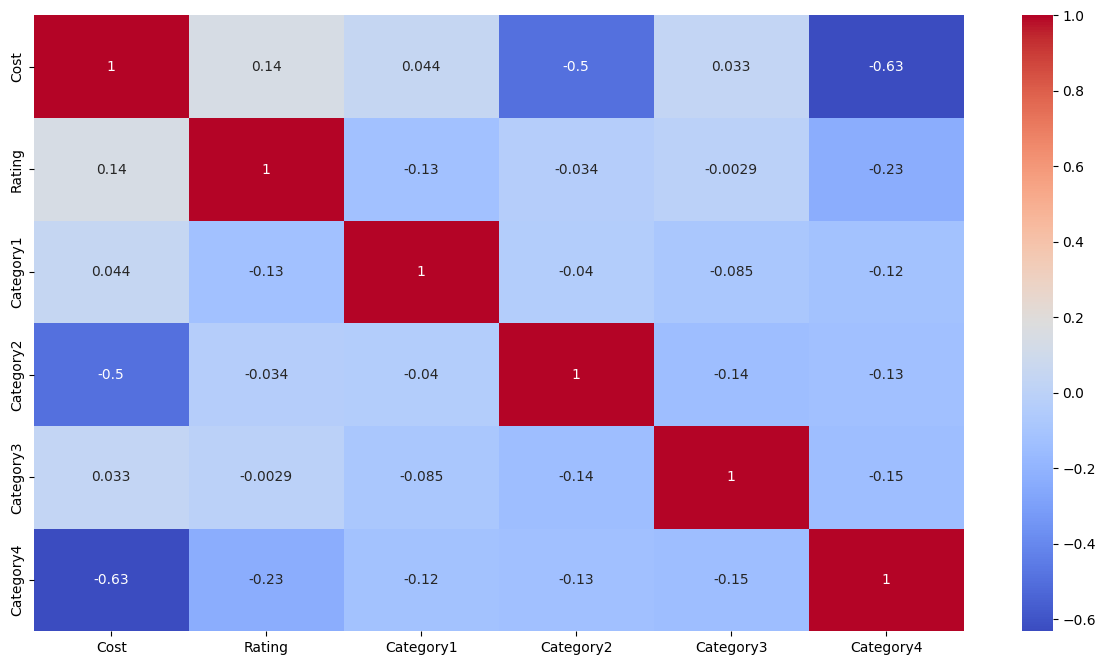

In [66]:
# Drop Null Values
new_df = df.dropna()
# Normalize the values
new_df[['Cost', 'Category1', 'Category2', 'Category3', 'Category4']]=normalize(new_df[['Cost', 'Category1', 'Category2', 'Category3', 'Category4']])
# Correlation Analysis
correlation_matrix =new_df.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

We can see that there is not much correlation of the features with ratings,hence we cannot use regression to find the unknown ratings.We will replace these values with the median.

In [67]:
# Replace 'ratings' with the actual name of your ratings column
median_rating = restaurant['Rating'].median()

# Replace null values with the median
restaurant['Rating'].fillna(median_rating, inplace=True)

##Data required for ML model

In [68]:
features = ['Name','Cost', 'Category1','Category2', 'Category3', 'Category4','Rating']
ML_data=restaurant[features]

In [69]:
ML_data

,Name,Cost,Category1,Category2,Category3,Category4,Rating
0,Beyond Flavours,800,0,1,1,4,4.280
1,Paradise,800,0,0,0,3,4.700
2,Flechazo,1300,0,0,1,3,4.660
3,Shah Ghouse Hotel & Restaurant,800,0,1,1,3,3.210
4,Over The Moon Brew Company,1200,0,0,1,4,4.340
...,...,...,...,...,...,...,...
100,IndiBlaze,600,0,0,1,1,3.615
101,Sweet Basket,200,1,0,0,1,3.615
102,Angaara Counts 3,500,0,0,0,3,3.615
103,Wich Please,250,0,0,0,1,3.615


In [70]:
X=ML_data.drop(columns=['Name'])

#Clustering

##KMeans Clustering

###Elbow curve
Finding k by plotting inertia with number of clusters.

Text(0, 0.5, 'wcss')

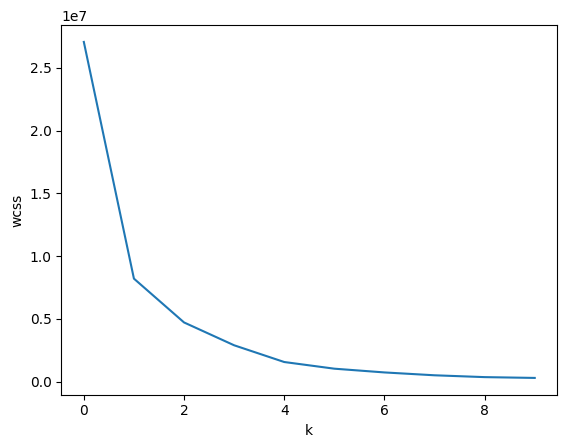

In [100]:
from sklearn.cluster import KMeans
#Finding the optimum k considering 10 clusters
loss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit_predict(X)
  loss.append(km.inertia_)
plt.plot(loss)
plt.xlabel('k')
plt.ylabel('wcss')

Observing the elbow curve, the elbow point is determined to be approximately at k=3, marked by the point where the curve exhibits a noticeable change in slope, indicating a significant reduction

###Clustering
Using the k value of 3 found from elbow curve

In [72]:
km=KMeans(n_clusters=3)
km.fit_predict(X)
clusters=km.labels_

In [73]:
clusters

array([1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 0,
       1, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0], dtype=int32)

In [74]:
# adding the clusters to the dataset data_cluster
ML_data['cluster_kmean']=clusters

In [75]:

new_df=ML_data.drop(columns=['Name'])

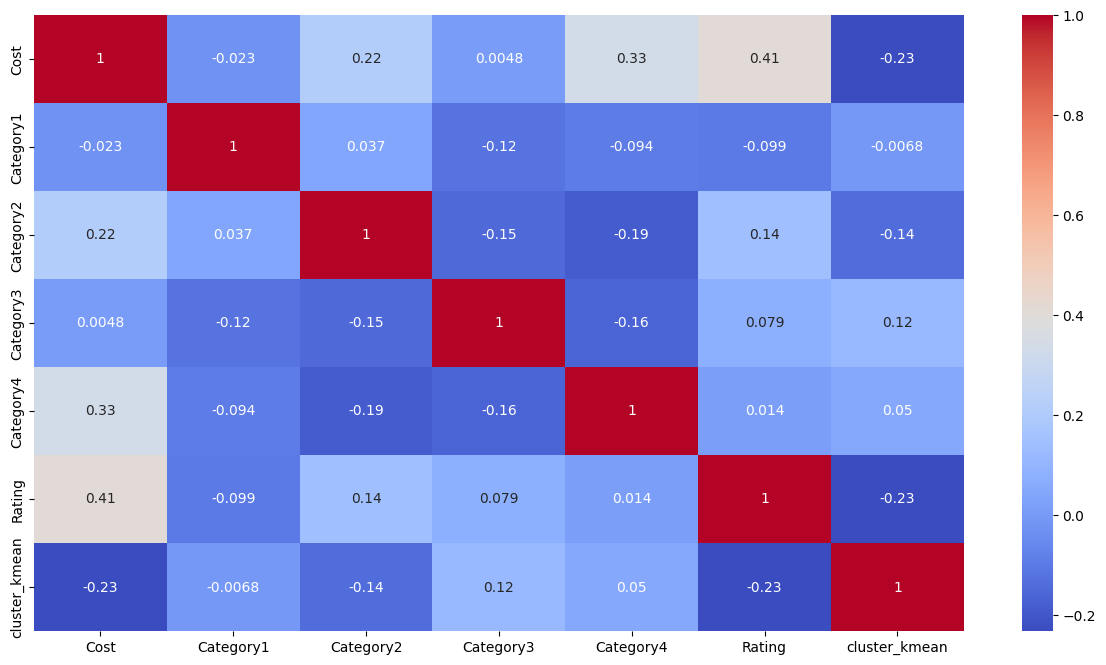

In [76]:
correlation_matrix =new_df.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

We can see that category1 and Cost and rating are the most correlated feature with the cluster label.

###Plot

<Axes: xlabel='Rating', ylabel='Cost'>

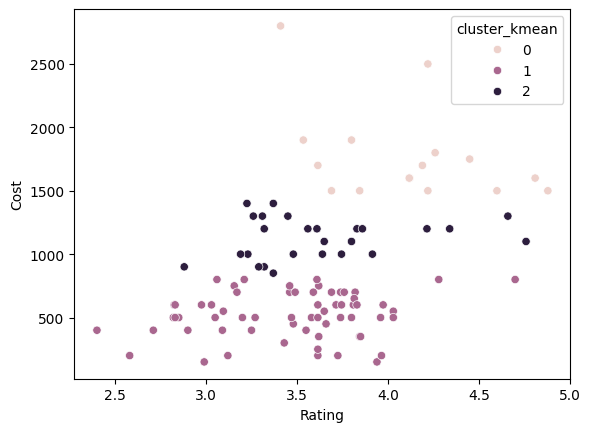

In [77]:
sns.scatterplot(data=ML_data, x='Rating', y='Cost', hue='cluster_kmean')

In [78]:
data=ML_data.drop(columns=['Name'])
cluster_groups = data.groupby('cluster_kmean')

# Calculate properties for each cluster
cluster_properties = cluster_groups.agg(['mean', 'min', 'max'])


In [79]:
cluster_properties

Cost             Category1         Category2          \
                      mean   min   max      mean min max      mean min max   
cluster_kmean                                                                
0              1771.875000  1500  2800  0.125000   0   1  0.750000   0   2   
1               521.428571   150   800  0.111111   0   1  0.238095   0   2   
2              1125.000000   850  1400  0.115385   0   1  0.384615   0   3   

              Category3         Category4            Rating              
                   mean min max      mean min max      mean   min   max  
cluster_kmean                                                            
0              0.312500   0   2  2.250000   0   5  4.110165  3.41  4.88  
1              0.476190   0   3  1.873016   0   4  3.465143  2.40  4.70  
2              0.576923   0   2  2.307692   1   4  3.626154  2.88  4.76

#Clusters

* We have found 3 categories of restaurants(clusters).

*Cluster 0*

* Average cost is 1772,ranging from 1500 to 2800.
* Among the 3 cluster,restaurant from this cluster has higher chance of offering category1 and category2 cuisines and lowest chance of offering category3 cuisines.
* Average number of category1,category2,category3 and category4 cuisines offered by these restaurants are 0.125,0.75,0.3125 and 2.25 respectively.
* Among the 3 cluster,restaurants from this cluster has highest average rating 4.11 ranging from 3.41 to 4.88


*Cluster 1*


* Average cost is 521,ranging from 150 to 800.
* Among the 3 cluster,restaurants from this cluster has lowest chance of offering category1,category2 and category4 cuisines.
* Average number of category1,category2,category3 and category4 cuisines offered by these restaurants are 0.111111,0.238095,0.476190 and 1.873016 respectively.
* Among the 3 cluster,restaurants from this cluster has lowest average rating 3.465 ranging from 2.4 to 4.7

*Cluster 2*

* Average cost is 1125,ranging from 850 to 1400.
* Among the 3 cluster,restaurant from this cluster has higher chance of offering category3 and category4 cuisines.
* Average number of category1,category2,category3 and category4 cuisines offered by these restaurants are 0.115385,0.384615,0.576923 and 2.307692 respectively.
* Average rating for these restaurants are on a lower side,3.626 ranging from 2.88 to 4.76.


In [80]:
cluster0 = []
cluster1 = []
cluster2 = []
for i in range(len(ML_data)):
  if ML_data['cluster_kmean'][i] == 0:
    cluster0.append(ML_data['Name'][i])
  elif ML_data['cluster_kmean'][i] == 1:
    cluster1.append(ML_data['Name'][i])
  elif ML_data['cluster_kmean'][i] == 2:
    cluster2.append(ML_data['Name'][i])

In [81]:
cluster0

["The Fisherman's Wharf",
 'Barbeque Nation',
 "AB's - Absolute Barbecues",
 '10 Downing Street',
 "Jonathan's Kitchen - Holiday Inn Express & Suites",
 'B-Dubs',
 'Mazzo - Marriott Executive Apartments',
 'Feast - Sheraton Hyderabad Hotel',
 'Komatose - Holiday Inn Express & Suites',
 'The Tilt Bar Republic',
 'The Indi Grill',
 'Arena Eleven',
 'Cascade - Radisson Hyderabad Hitec City',
 'Collage - Hyatt Hyderabad Gachibowli',
 'Zega - Sheraton Hyderabad Hotel',
 'Republic Of Noodles - Lemon Tree Hotel']

In [82]:
cluster1

['Beyond Flavours',
 'Paradise',
 'Shah Ghouse Hotel & Restaurant',
 'eat.fit',
 'Shah Ghouse Spl Shawarma',
 'Cream Stone',
 "Sardarji's Chaats & More",
 'Absolute Sizzlers',
 'KFC',
 'NorFest - The Dhaba',
 'Hotel Zara Hi-Fi',
 'Pakwaan Grand',
 '13 Dhaba',
 'Amul',
 'Behrouz Biryani',
 'Hunger Maggi Point',
 'Marsala Food Company',
 'Green Bawarchi Restaurant',
 'Banana Leaf Multicuisine Restaurant',
 'Kritunga Restaurant',
 'Deli 9 Bistro',
 'Karachi Bakery',
 'Karachi Cafe',
 'The Foodie Monster Kitchen',
 'Shanghai Chef 2',
 "Udipi's Upahar",
 'Mathura Vilas',
 'Gal Punjab Di',
 'Hitech Bawarchi Food Zone',
 'Biryanis And More',
 'Asian Meal Box',
 'Cafe Eclat',
 'Being Hungry',
 'Tempteys',
 'KS Bakers',
 'Shree Santosh Dhaba Family Restaurant',
 'Hyderabad Chefs',
 'Aromas@11SIX',
 'Driven Cafe',
 'Faasos',
 'Royal Spicy Restaurant',
 'The Old Madras Baking Company',
 'Squeeze @ The Lime',
 'Olive Garden',
 'Tandoori Food Works',
 'Delhi-39',
 'Al Saba Restaurant',
 "GD's",
 'T

In [83]:
cluster2

['Flechazo',
 'Over The Moon Brew Company',
 'Hyper Local',
 'The Lal Street - Bar Exchange',
 'SKYHY',
 'Tiki Shack',
 'Mustang Terrace Lounge',
 "3B's - Buddies, Bar & Barbecue",
 'Pot Pourri',
 'Pista House',
 'Club Rogue',
 'The Glass Onion',
 'Frio Bistro',
 'La La Land - Bar & Kitchen',
 'Owm Nom Nom',
 'Ulavacharu',
 'Diners Pavilion',
 'PourHouse7',
 'Prism Club & Kitchen',
 'Dine O China',
 'Yum Yum Tree - The Arabian Food Court',
 'Urban Asia - Kitchen & Bar',
 'Eat India Company',
 'Labonel',
 'Khaan Saab',
 'Chinese Pavilion']

#Variable control chart on Rating

In [262]:
data=reviews1

In [263]:
# Drop rows with missing values in Rating and Time columns
data.dropna(subset=['Rating','Time'], inplace=True)

# Convert Time column to datetime format
data['Time'] = pd.to_datetime(data['Time'])

# Check the data types of all columns
print(data.dtypes)

# Convert the Rating column to numeric type
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

# Remove rows with non-numeric Ratings
data = data.dropna(subset=['Rating'])

# Set the Time column as the index
data.set_index('Time', inplace=True)

# Resample data to end of each day and calculate average Rating
data_daily_avg = data['Rating'].resample('D').mean()

# Perform linear interpolation to fill missing values
data_daily_avg = data_daily_avg.interpolate(method='linear')

# Consider only the last 60 days data
data_daily_avg_6 = data_daily_avg.tail(60)

Restaurant                     object
Reviewer                       object
Review                         object
Rating                        float64
Metadata                       object
Time                   datetime64[ns]
Pictures                        int64
Preprocessed_Review            object
Sentiment                     float64
dtype: object


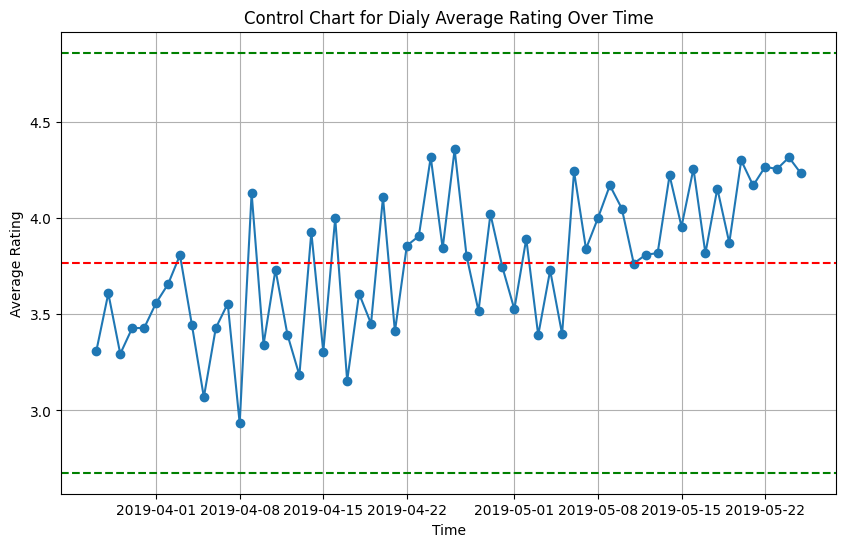

In [264]:
# Plot control chart
plt.figure(figsize=(10, 6))
plt.plot(data_daily_avg_6.index, data_daily_avg_6.values, marker='o', linestyle='-')
plt.axhline(data_daily_avg_6.mean(), color='red', linestyle='--', label='Mean')
plt.axhline(data_daily_avg_6.mean() + 3 * data_daily_avg_6.std(), color='green', linestyle='--', label='UCL')
plt.axhline(max(0,data_daily_avg_6.mean() - 3 * data_daily_avg_6.std()), color='green', linestyle='--', label='LCL')
plt.title('Control Chart for Dialy Average Rating Over Time')
plt.xlabel('Time')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

We can see that the process is in control for past 60 days.We will do further analysis on each of the restaurant clusters to get more details.

##Clusterwise analysis

In [265]:
data=reviews1

In [266]:
# Create masks to filter the dataframe based on the restaurant names in each cluster
cluster_0_mask = data['Restaurant'].isin(cluster0)
cluster_1_mask = data['Restaurant'].isin(cluster1)
cluster_2_mask = data['Restaurant'].isin(cluster2)

# Create separate dataframes for each cluster
cluster_0_data = data[cluster_0_mask]
cluster_1_data = data[cluster_1_mask]
cluster_2_data = data[cluster_2_mask]

###Cluster0

In [267]:
# Drop rows with missing values in Rating and Time columns
cluster_0_data.dropna(subset=['Rating','Time'], inplace=True)

# Convert Time column to datetime format
cluster_0_data['Time'] = pd.to_datetime(cluster_0_data['Time'])

# Check the data types of all columns
print(cluster_0_data.dtypes)

# Convert the Rating column to numeric type
cluster_0_data['Rating'] = pd.to_numeric(cluster_0_data['Rating'], errors='coerce')

# Remove rows with non-numeric Ratings
cluster_0_data = cluster_0_data.dropna(subset=['Rating'])

# Set the Time column as the index
cluster_0_data.set_index('Time', inplace=True)

# Resample data to end of each day and calculate average Rating
cluster_0_data_daily_avg = cluster_0_data['Rating'].resample('D').mean()

# Perform linear interpolation to fill missing values
cluster_0_data_daily_avg = cluster_0_data_daily_avg.interpolate(method='linear')

# Consider only the last 50 days data
cluster_0_data_daily_avg_6 = cluster_0_data_daily_avg.tail(60)

Restaurant                     object
Reviewer                       object
Review                         object
Rating                        float64
Metadata                       object
Time                   datetime64[ns]
Pictures                        int64
Preprocessed_Review            object
Sentiment                     float64
dtype: object


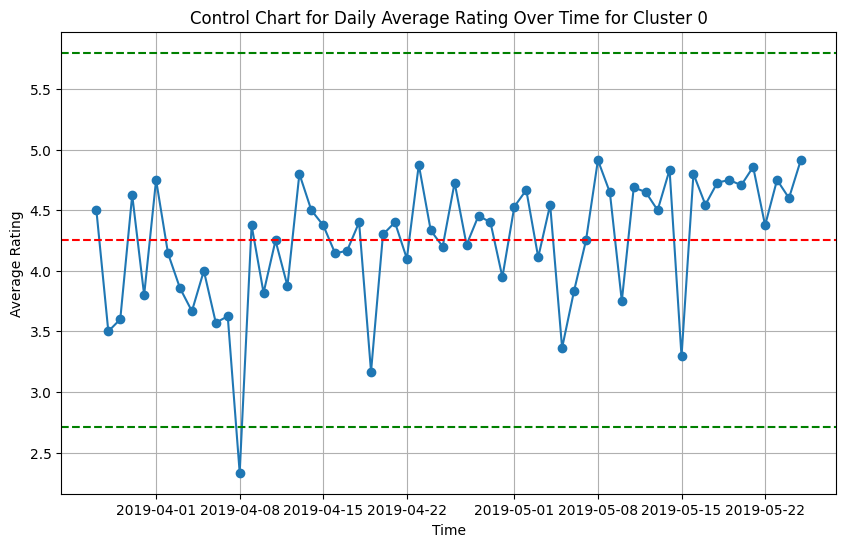

In [268]:
# Plot control chart
plt.figure(figsize=(10, 6))
plt.plot(cluster_0_data_daily_avg_6.index, cluster_0_data_daily_avg_6.values, marker='o', linestyle='-')
plt.axhline(cluster_0_data_daily_avg_6.mean(), color='red', linestyle='--', label='Mean')
plt.axhline(cluster_0_data_daily_avg_6.mean() + 3 * cluster_0_data_daily_avg_6.std(), color='green', linestyle='--', label='UCL')
plt.axhline(max(0,cluster_0_data_daily_avg_6.mean() - 3 * cluster_0_data_daily_avg_6.std()), color='green', linestyle='--', label='LCL')
plt.title('Control Chart for Daily Average Rating Over Time for Cluster 0')
plt.xlabel('Time')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

Process is gone out of control for one instance in past 60 days for this cluster.

###Cluster1

In [269]:
# Drop rows with missing values in Rating and Time columns
cluster_1_data.dropna(subset=['Rating','Time'], inplace=True)

# Convert Time column to datetime format
cluster_1_data['Time'] = pd.to_datetime(cluster_1_data['Time'])

# Check the data types of all columns
print(cluster_1_data.dtypes)

# Convert the Rating column to numeric type
cluster_1_data['Rating'] = pd.to_numeric(cluster_1_data['Rating'], errors='coerce')

# Remove rows with non-numeric Ratings
cluster_1_data = cluster_1_data.dropna(subset=['Rating'])

# Set the Time column as the index
cluster_1_data.set_index('Time', inplace=True)

# Resample data to end of each day and calculate average Rating
cluster_1_data_daily_avg = cluster_1_data['Rating'].resample('D').mean()

# Perform linear interpolation to fill missing values
cluster_1_data_daily_avg = cluster_1_data_daily_avg.interpolate(method='linear')

# Consider only the last 60 days data
cluster_1_data_daily_avg_6 = cluster_1_data_daily_avg.tail(60)



Restaurant                     object
Reviewer                       object
Review                         object
Rating                        float64
Metadata                       object
Time                   datetime64[ns]
Pictures                        int64
Preprocessed_Review            object
Sentiment                     float64
dtype: object


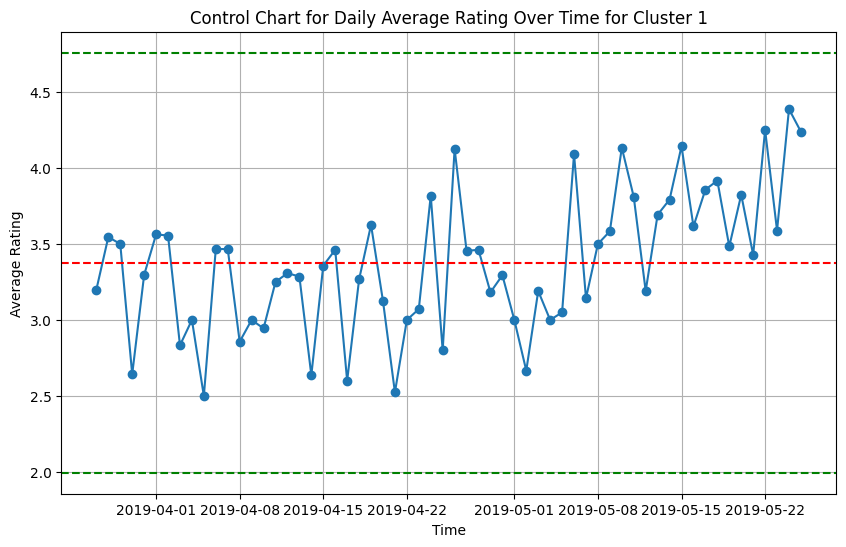

In [270]:
# Plot control chart
plt.figure(figsize=(10, 6))
plt.plot(cluster_1_data_daily_avg_6.index, cluster_1_data_daily_avg_6.values, marker='o', linestyle='-')
plt.axhline(cluster_1_data_daily_avg_6.mean(), color='red', linestyle='--', label='Mean')
plt.axhline(cluster_1_data_daily_avg_6.mean() + 3 * cluster_1_data_daily_avg_6.std(), color='green', linestyle='--', label='UCL')
plt.axhline(max(0,cluster_1_data_daily_avg_6.mean() - 3 * cluster_1_data_daily_avg_6.std()), color='green', linestyle='--', label='LCL')
plt.title('Control Chart for Daily Average Rating Over Time for Cluster 1')
plt.xlabel('Time')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

Process is in control for this cluster.

###Cluster2

In [271]:
# Drop rows with missing values in Rating and Time columns
cluster_2_data.dropna(subset=['Rating','Time'], inplace=True)

# Convert Time column to datetime format
cluster_2_data['Time'] = pd.to_datetime(cluster_2_data['Time'])

# Check the data types of all columns
print(cluster_2_data.dtypes)

# Convert the Rating column to numeric type
cluster_2_data['Rating'] = pd.to_numeric(cluster_2_data['Rating'], errors='coerce')

# Remove rows with non-numeric Ratings
cluster_2_data = cluster_2_data.dropna(subset=['Rating'])

# Set the Time column as the index
cluster_2_data.set_index('Time', inplace=True)

# Resample data to end of each day and calculate average Rating
cluster_2_data_daily_avg = cluster_2_data['Rating'].resample('D').mean()

# Perform linear interpolation to fill missing values
cluster_2_data_daily_avg = cluster_2_data_daily_avg.interpolate(method='linear')

# Consider only the last 60 days data
cluster_2_data_daily_avg_6 = cluster_2_data_daily_avg.tail(60)

Restaurant                     object
Reviewer                       object
Review                         object
Rating                        float64
Metadata                       object
Time                   datetime64[ns]
Pictures                        int64
Preprocessed_Review            object
Sentiment                     float64
dtype: object


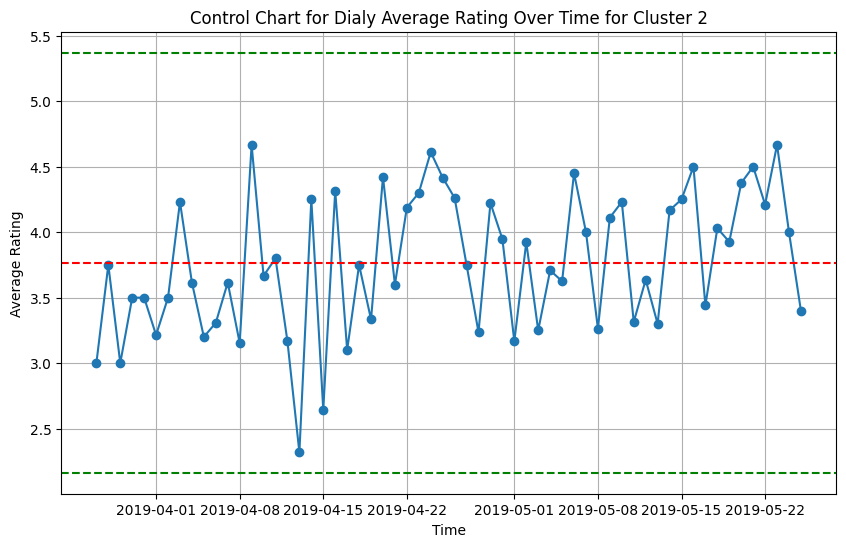

In [272]:
# Plot control chart
plt.figure(figsize=(10, 6))
plt.plot(cluster_2_data_daily_avg_6.index, cluster_2_data_daily_avg_6.values, marker='o', linestyle='-')
plt.axhline(cluster_2_data_daily_avg_6.mean(), color='red', linestyle='--', label='Mean')
plt.axhline(cluster_2_data_daily_avg_6.mean() + 3 * cluster_2_data_daily_avg_6.std(), color='green', linestyle='--', label='UCL')
plt.axhline(max(0,cluster_2_data_daily_avg_6.mean() - 3 * cluster_2_data_daily_avg_6.std()), color='green', linestyle='--', label='LCL')
plt.title('Control Chart for Dialy Average Rating Over Time for Cluster 2')
plt.xlabel('Time')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

Process is in control for this cluster.

#Variable control chart on sentiment

In [273]:
data=reviews1

In [274]:
data.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Preprocessed_Review', 'Sentiment'],
      dtype='object')

In [275]:
# Drop rows with missing values in Sentiment and Time columns
data.dropna(subset=['Sentiment','Time'], inplace=True)

# Convert Time column to datetime format
data['Time'] = pd.to_datetime(data['Time'])

# Check the data types of all columns
print(data.dtypes)

# Convert the Sentiment column to numeric type
data['Sentiment'] = pd.to_numeric(data['Sentiment'], errors='coerce')

# Remove rows with non-numeric Sentiments
data = data.dropna(subset=['Sentiment'])

# Set the Time column as the index
data.set_index('Time', inplace=True)

# Resample data to end of each day and calculate average Sentiment
data_daily_avg = data['Sentiment'].resample('D').mean()

# Perform linear interpolation to fill missing values
data_daily_avg = data_daily_avg.interpolate(method='linear')

# Consider only the last 60 days data
data_daily_avg_6 = data_daily_avg.tail(60)

Restaurant                     object
Reviewer                       object
Review                         object
Rating                        float64
Metadata                       object
Time                   datetime64[ns]
Pictures                        int64
Preprocessed_Review            object
Sentiment                     float64
dtype: object


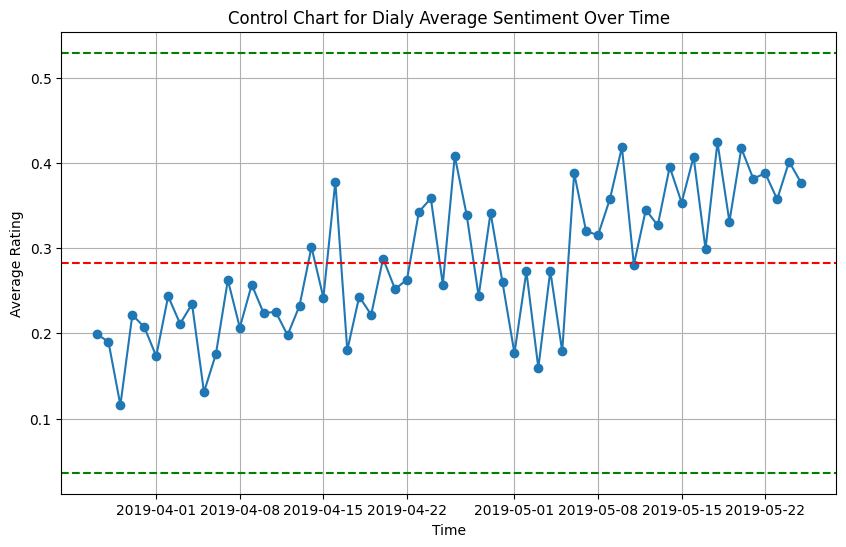

In [276]:
# Plot control chart
plt.figure(figsize=(10, 6))
plt.plot(data_daily_avg_6.index, data_daily_avg_6.values, marker='o', linestyle='-')
plt.axhline(data_daily_avg_6.mean(), color='red', linestyle='--', label='Mean')
plt.axhline(data_daily_avg_6.mean() + 3 * data_daily_avg_6.std(), color='green', linestyle='--', label='UCL')
plt.axhline(max(0,data_daily_avg_6.mean() - 3 * data_daily_avg_6.std()), color='green', linestyle='--', label='LCL')
plt.title('Control Chart for Dialy Average Sentiment Over Time')
plt.xlabel('Time')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

We can see that the process is in control for past 60 days.We will do further analysis on each of the restaurant clusters to get more details.

##Clusterwise analysis

In [277]:
data=reviews1

In [278]:
# Create masks to filter the dataframe based on the restaurant names in each cluster
cluster_0_mask = data['Restaurant'].isin(cluster0)
cluster_1_mask = data['Restaurant'].isin(cluster1)
cluster_2_mask = data['Restaurant'].isin(cluster2)

# Create separate dataframes for each cluster
cluster_0_data = data[cluster_0_mask]
cluster_1_data = data[cluster_1_mask]
cluster_2_data = data[cluster_2_mask]

###Cluster0

In [279]:
# Drop rows with missing values in Sentiment and Time columns
cluster_0_data.dropna(subset=['Sentiment','Time'], inplace=True)

# Convert Time column to datetime format
cluster_0_data['Time'] = pd.to_datetime(cluster_0_data['Time'])

# Check the data types of all columns
print(cluster_0_data.dtypes)

# Convert the Sentiment column to numeric type
cluster_0_data['Sentiment'] = pd.to_numeric(cluster_0_data['Sentiment'], errors='coerce')

# Remove rows with non-numeric Sentiments
cluster_0_data = cluster_0_data.dropna(subset=['Sentiment'])

# Set the Time column as the index
cluster_0_data.set_index('Time', inplace=True)

# Resample data to end of each day and calculate average Sentiment
cluster_0_data_daily_avg = cluster_0_data['Sentiment'].resample('D').mean()

# Perform linear interpolation to fill missing values
cluster_0_data_daily_avg = cluster_0_data_daily_avg.interpolate(method='linear')

# Consider only the last 50 days data
cluster_0_data_daily_avg_6 = cluster_0_data_daily_avg.tail(60)

Restaurant                     object
Reviewer                       object
Review                         object
Rating                        float64
Metadata                       object
Time                   datetime64[ns]
Pictures                        int64
Preprocessed_Review            object
Sentiment                     float64
dtype: object


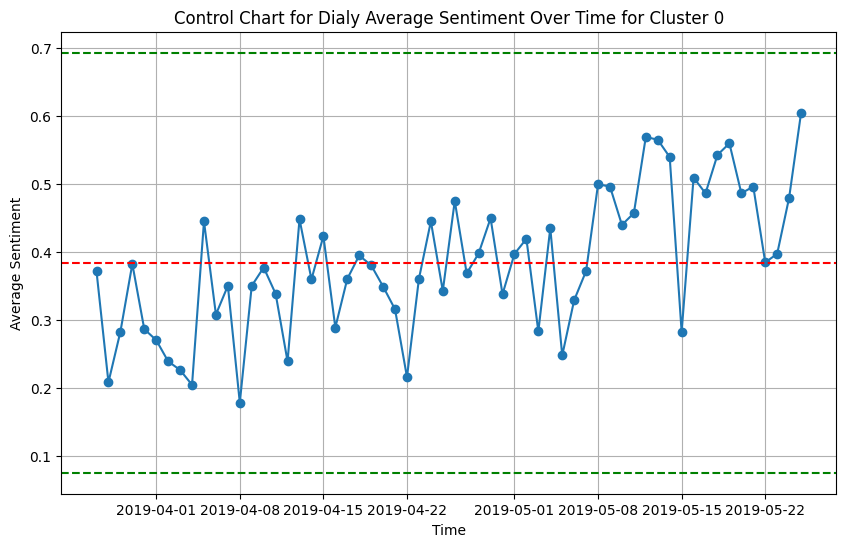

In [280]:
# Plot control chart
plt.figure(figsize=(10, 6))
plt.plot(cluster_0_data_daily_avg_6.index, cluster_0_data_daily_avg_6.values, marker='o', linestyle='-')
plt.axhline(cluster_0_data_daily_avg_6.mean(), color='red', linestyle='--', label='Mean')
plt.axhline(cluster_0_data_daily_avg_6.mean() + 3 * cluster_0_data_daily_avg_6.std(), color='green', linestyle='--', label='UCL')
plt.axhline(max(0,cluster_0_data_daily_avg_6.mean() - 3 * cluster_0_data_daily_avg_6.std()), color='green', linestyle='--', label='LCL')
plt.title('Control Chart for Dialy Average Sentiment Over Time for Cluster 0')
plt.xlabel('Time')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.show()

Process is in control for this cluster.

###Cluster1

In [281]:
# Drop rows with missing values in Sentiment and Time columns
cluster_1_data.dropna(subset=['Sentiment','Time'], inplace=True)

# Convert Time column to datetime format
cluster_1_data['Time'] = pd.to_datetime(cluster_1_data['Time'])

# Check the data types of all columns
print(cluster_1_data.dtypes)

# Convert the Sentiment column to numeric type
cluster_1_data['Sentiment'] = pd.to_numeric(cluster_1_data['Sentiment'], errors='coerce')

# Remove rows with non-numeric Sentiments
cluster_1_data = cluster_1_data.dropna(subset=['Sentiment'])

# Set the Time column as the index
cluster_1_data.set_index('Time', inplace=True)

# Resample data to end of each day and calculate average Sentiment
cluster_1_data_daily_avg = cluster_1_data['Sentiment'].resample('D').mean()

# Perform linear interpolation to fill missing values
cluster_1_data_daily_avg = cluster_1_data_daily_avg.interpolate(method='linear')

# Consider only the last 60 days data
cluster_1_data_daily_avg_6 = cluster_1_data_daily_avg.tail(60)



Restaurant                     object
Reviewer                       object
Review                         object
Rating                        float64
Metadata                       object
Time                   datetime64[ns]
Pictures                        int64
Preprocessed_Review            object
Sentiment                     float64
dtype: object


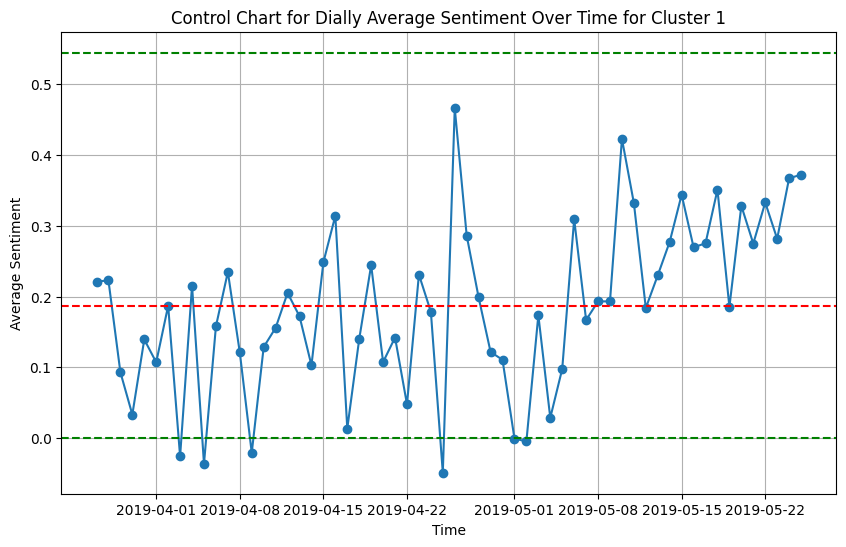

In [282]:
# Plot control chart
plt.figure(figsize=(10, 6))
plt.plot(cluster_1_data_daily_avg_6.index, cluster_1_data_daily_avg_6.values, marker='o', linestyle='-')
plt.axhline(cluster_1_data_daily_avg_6.mean(), color='red', linestyle='--', label='Mean')
plt.axhline(cluster_1_data_daily_avg_6.mean() + 3 * cluster_1_data_daily_avg_6.std(), color='green', linestyle='--', label='UCL')
plt.axhline(max(0,cluster_1_data_daily_avg_6.mean() - 3 * cluster_1_data_daily_avg_6.std()), color='green', linestyle='--', label='LCL')
plt.title('Control Chart for Dially Average Sentiment Over Time for Cluster 1')
plt.xlabel('Time')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.show()

Process is out of control with sentiment falling below 0 multiple instances for this cluster,which indicates the need for further deepdown on the restaurants in this cluster.

###Cluster2

In [283]:
# Drop rows with missing values in Sentiment and Time columns
cluster_2_data.dropna(subset=['Sentiment','Time'], inplace=True)

# Convert Time column to datetime format
cluster_2_data['Time'] = pd.to_datetime(cluster_2_data['Time'])

# Check the data types of all columns
print(cluster_2_data.dtypes)

# Convert the Sentiment column to numeric type
cluster_2_data['Sentiment'] = pd.to_numeric(cluster_2_data['Sentiment'], errors='coerce')

# Remove rows with non-numeric Sentiments
cluster_2_data = cluster_2_data.dropna(subset=['Sentiment'])

# Set the Time column as the index
cluster_2_data.set_index('Time', inplace=True)

# Resample data to end of each day and calculate average Sentiment
cluster_2_data_daily_avg = cluster_2_data['Sentiment'].resample('D').mean()

# Perform linear interpolation to fill missing values
cluster_2_data_daily_avg = cluster_2_data_daily_avg.interpolate(method='linear')

# Consider only the last 60 days data
cluster_2_data_daily_avg_6 = cluster_2_data_daily_avg.tail(60)

Restaurant                     object
Reviewer                       object
Review                         object
Rating                        float64
Metadata                       object
Time                   datetime64[ns]
Pictures                        int64
Preprocessed_Review            object
Sentiment                     float64
dtype: object


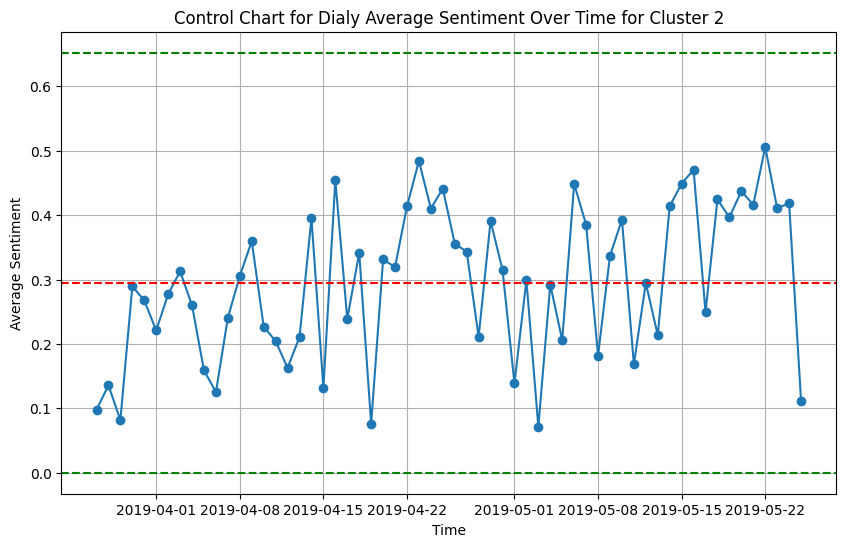

In [284]:
# Plot control chart
plt.figure(figsize=(10, 6))
plt.plot(cluster_2_data_daily_avg_6.index, cluster_2_data_daily_avg_6.values, marker='o', linestyle='-')
plt.axhline(cluster_2_data_daily_avg_6.mean(), color='red', linestyle='--', label='Mean')
plt.axhline(cluster_2_data_daily_avg_6.mean() + 3 * cluster_2_data_daily_avg_6.std(), color='green', linestyle='--', label='UCL')
plt.axhline(max(0,cluster_2_data_daily_avg_6.mean() - 3 * cluster_2_data_daily_avg_6.std()), color='green', linestyle='--', label='LCL')
plt.title('Control Chart for Dialy Average Sentiment Over Time for Cluster 2')
plt.xlabel('Time')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.show()

Process is incontrol for this cluster.